# Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from operator import add  # import the add operator from the operator module

# Transmittd Signal


In [2]:

transmit_signal = [100, 80, 60, 40, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#transmit_signal = eval(input("Enter the input sequence like a list format : "))
#len(transmit_signal)

r = int(input("Length of the Signal : "))
time_period = int(input("Number of time period : "))

Length of the Signal : 80
Number of time period : 44


In [3]:
transmited_signal = np.pad(transmit_signal, (10,50),'constant')

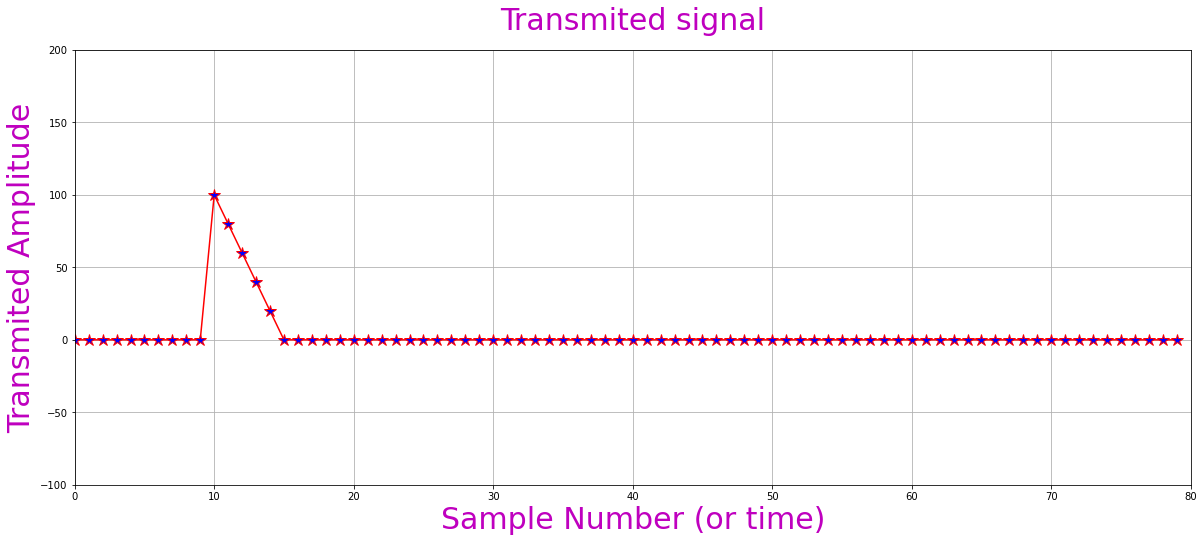

''

In [4]:
plt.figure(figsize = (20, 8))
plt.plot(transmited_signal, "r*", linestyle = 'solid', markerfacecolor = "blue", markersize = 12)
plt.ylim(-100, 200)
plt.xlim(0, r)
plt.grid()
plt.title("Transmited signal", color = "m", size = 30, pad = 20)
plt.xlabel("Sample Number (or time)",color = "m", size = 30)
plt.ylabel("Transmited Amplitude",color = "m", size = 30)
plt.show();
;

# Received Signal

In [5]:
x = [] # empty list for store the received signal after shifting

In [6]:
N = 0
T = 0 # Signal Shifting
j = 0

In [7]:

for i in range(r):
    if (T < time_period):
        x.append(0) # assign "0" till shifting signal
        T += 1
        
    else:
        x.append(transmit_signal[j]) # assign transmitted signal in periodic index
        j += 1
        N += 1
        if (N >= len(transmit_signal)): # when "N" greater than or equal to length of transmitted signal that time N, T, J have to "0"
            N = 0
            T = 0
            j = 0
            
#print(x)            
    

In [8]:
# Noise value
y = np.random.randn(1, r)

#print(y)

In [9]:
y.shape # y is the two Dimensional(2D) array  

(1, 80)

In [10]:
# Received signal is one Dimensional(1D) so have to convert this noise from (2D) to (1D)

y = y.flatten() # flatten() function use for convert 2D to 1D array
#y

In [11]:
# use map() function with add operator to add the elements of the lists "a" which is received signal and "x" which is transmitted signal
result = list(map(add, x, y))
#print(result)

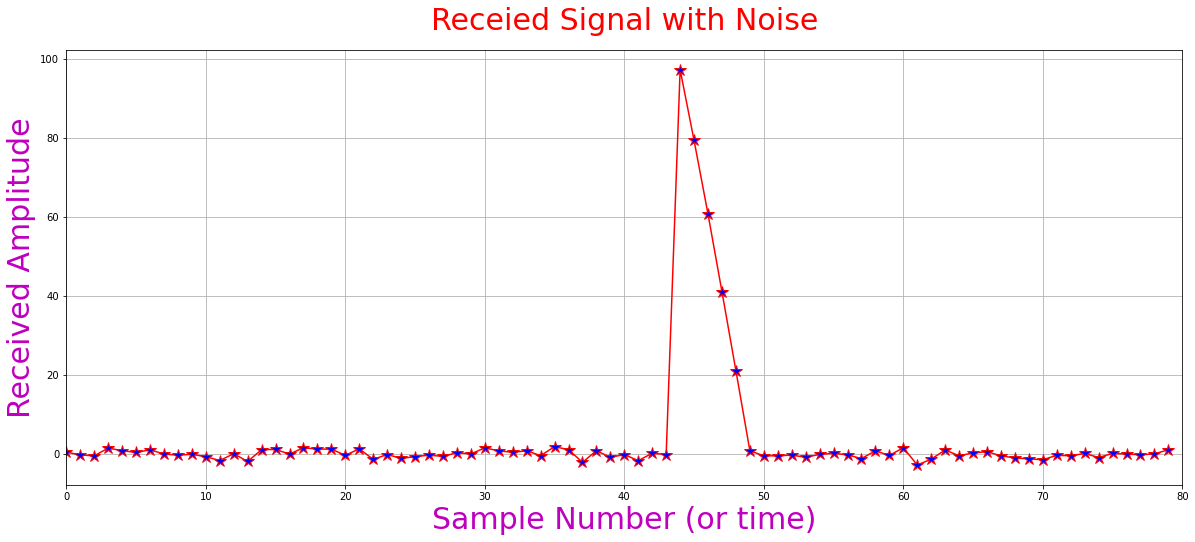

In [12]:

plt.figure(figsize = (20, 8))
plt.plot(result, "r*", linestyle = 'solid', markerfacecolor = 'b', markersize = 12)
plt.xlim(0, r)
plt.grid()
plt.title("Receied Signal with Noise", color = "red", size = 30, pad = 20)
plt.xlabel("Sample Number (or time)",color = "m", size = 30)
plt.ylabel("Received Amplitude",color = "m", size = 30)
plt.show();

In [13]:
transmit_signal

[100, 80, 60, 40, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [14]:
import numpy as np

# Circular shift operation

def shifter (matrix):
    last = matrix[len(matrix) - 1]
    x = len(matrix)
    result = [0] * x
    
    
    for i in range(1, len(matrix)):
        result[i] = matrix[i - 1]
        
        result[0] = last
        
    return result
        
        

In [15]:
# Finding circular Convolution

def findCircularConvolution(x, h, n, m):
    
    primary_matrix = np.zeros((max(n,m), max(n,m)))
    
    for i in range(0, len(primary_matrix[0])):
        
        primary_matrix[0][i] = x[i]
        
    for i in range(1, max(n,m)):
        
        primary_matrix[i] = shifter(primary_matrix[i - 1])
        
        ultimate_matrix = np.transpose(primary_matrix)
        
    difference_in_length = abs(n - m)
    
    for i in range(m, (m + difference_in_length)):
        
        h.append(0)
        
    resultant = np.dot(ultimate_matrix,  h)
    
    return  primary_matrix, resultant
    

In [16]:
x = result

h = transmit_signal

d, circular_convolution_result = findCircularConvolution(x, h, len(x), len(h))

#print(circular_convolution_result)

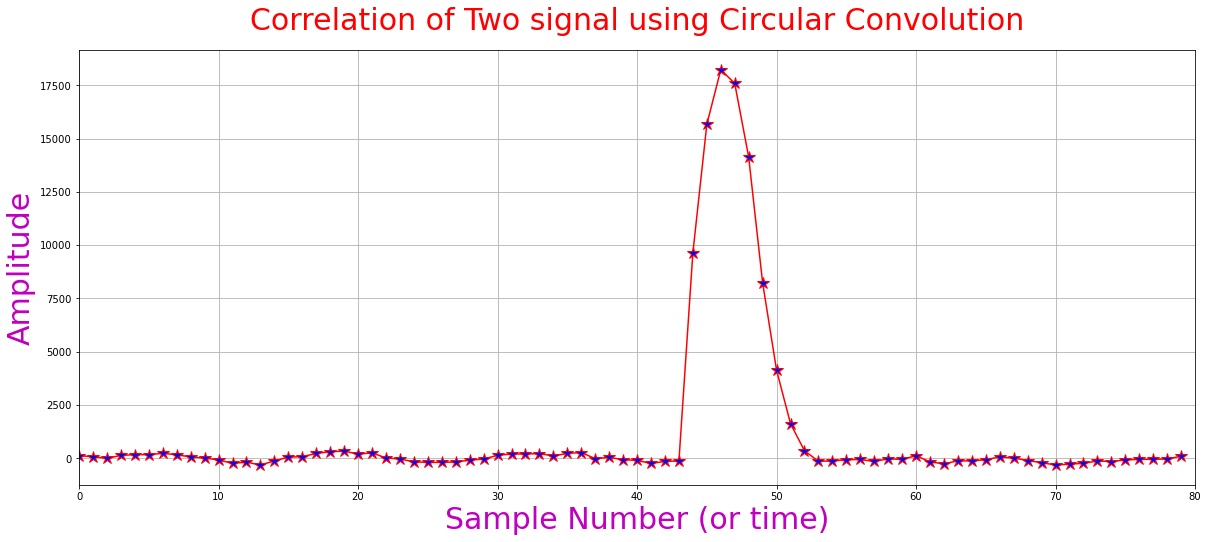

In [17]:
plt.figure(figsize = (20, 8))
plt.plot(circular_convolution_result, "r*", linestyle = 'solid', markerfacecolor = 'b', markersize = 12)
plt.xlim(0, r)
plt.grid()
plt.title("Correlation of Two signal using Circular Convolution", color = "red", size = 30, pad = 20)
plt.xlabel("Sample Number (or time)",color = "m", size = 30)
plt.ylabel("Amplitude",color = "m", size = 30)
plt.show();